In [ ]:
!pip install pydub
!pip install librosa

In [ ]:
!apt-get update
!apt-get install -y ffmpeg
!pip install pydub
!pip install librosa matplotlib

Hit:1 https://cli.github.com/packages stable InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
^C
^C


In [ ]:
from pydub import AudioSegment
import librosa
import numpy as np

# 1. Set the file name (must match the name of the uploaded file)
m4a_file = '095522039.m4a'

# 2. Load the m4a file
audio = AudioSegment.from_file(m4a_file, format='m4a')

# 3. Convert raw audio data to a numpy array
y = np.array(audio.get_array_of_samples()).astype(np.float32)
sr = audio.frame_rate

# 4. Convert stereo to mono (if necessary)
if audio.channels == 2:
    y = y.reshape((-1, 2))
    y = np.mean(y, axis=1)

# 5. Normalize the amplitude
y /= np.max(np.abs(y))

In [ ]:
import matplotlib.pyplot as plt
import torchaudio
import torchaudio.transforms as T
import torch
import os

# 1. 오디오 파일 로드
# 파일이 현재 폴더에 있다고 가정하고 경로를 지정합니다.
file_name = "095522039.m4a"
file_path = file_name

if not os.path.exists(file_path):
    print(f"오류: 파일 '{file_name}'이(가) 존재하지 않습니다. 파일을 다시 업로드해주세요.")
else:
    waveform, sample_rate = torchaudio.load(file_path)
    print("파일 로드 성공!")
    print(f"Sample rate: {sample_rate} Hz")
    print(f"Waveform shape: {waveform.shape}")

    # 2. Waveform 시각화
    plt.figure(figsize=(10, 4))
    plt.plot(waveform.t().numpy())
    plt.title(f"Waveform - {file_name} (SR={sample_rate})")
    plt.xlabel("Sample Index")
    plt.ylabel("Amplitude")
    plt.show()

    # 3. Spectrogram 시각화
    spectrogram_transform = T.Spectrogram(n_fft=400, win_length=400, hop_length=200)
    spectrogram = spectrogram_transform(waveform)

    plt.figure(figsize=(10, 4))
    plt.imshow(spectrogram.log2()[0, :, :].numpy(), cmap='inferno', origin='lower', aspect='auto')
    plt.title(f"Spectrogram - {file_name} (SR={sample_rate})")
    plt.xlabel("Time")
    plt.ylabel("Frequency Bin")
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
import torchaudio
import torchaudio.transforms as T
import torch
import os

# 1. 오디오 파일 로드
# 파일이 현재 폴더에 있다고 가정하고 경로를 지정합니다.
file_name = "095522040.m4a"
file_path = file_name

if not os.path.exists(file_path):
    print(f"오류: 파일 '{file_name}'이(가) 존재하지 않습니다. 파일을 확인해주세요.")
else:
    waveform, sample_rate = torchaudio.load(file_path)
    print("파일 로드 성공!")
    print(f"Sample rate: {sample_rate} Hz")
    print(f"Waveform shape: {waveform.shape}")

    # 2. 리샘플링 변환
    new_sample_rate_down = sample_rate // 2
    resampler_down = T.Resample(orig_freq=sample_rate, new_freq=new_sample_rate_down)
    downsampled_waveform = resampler_down(waveform)

    new_sample_rate_up = sample_rate * 2
    resampler_up = T.Resample(orig_freq=sample_rate, new_freq=new_sample_rate_up)
    upsampled_waveform = resampler_up(waveform)

    # 3. 스펙트로그램 변환
    spectrogram_transform = T.Spectrogram(n_fft=400, win_length=400, hop_length=200)
    original_spectrogram = spectrogram_transform(waveform)
    downsampled_spectrogram = spectrogram_transform(downsampled_waveform)
    upsampled_spectrogram = spectrogram_transform(upsampled_waveform)

    # 4. 모든 파형 및 스펙트로그램 시각화
    fig, axes = plt.subplots(3, 2, figsize=(16, 15))
    fig.suptitle("Resampling Effect on Waveform & Spectrogram", fontsize=18)

    # Waveform 그래프 (왼쪽 열)
    axes[0, 0].plot(waveform.t().numpy())
    axes[0, 0].set_title(f"Original Waveform (SR={sample_rate})")
    axes[0, 0].set_xlabel("Sample Index")

    axes[1, 0].plot(downsampled_waveform.t().numpy())
    axes[1, 0].set_title(f"Downsampled Waveform (SR={new_sample_rate_down})")
    axes[1, 0].set_xlabel("Sample Index")

    axes[2, 0].plot(upsampled_waveform.t().numpy())
    axes[2, 0].set_title(f"Upsampled Waveform (SR={new_sample_rate_up})")
    axes[2, 0].set_xlabel("Sample Index")

    # Spectrogram 그래프 (오른쪽 열)
    db_transform = T.AmplitudeToDB()
    axes[0, 1].imshow(db_transform(original_spectrogram).numpy()[0], cmap='inferno', origin='lower', aspect='auto')
    axes[0, 1].set_title("Original Spectrogram")
    axes[0, 1].set_xlabel("Time")
    axes[0, 1].set_ylabel("Frequency Bin")

    axes[1, 1].imshow(db_transform(downsampled_spectrogram).numpy()[0], cmap='inferno', origin='lower', aspect='auto')
    axes[1, 1].set_title("Downsampled Spectrogram")
    axes[1, 1].set_xlabel("Time")
    axes[1, 1].set_ylabel("Frequency Bin")

    axes[2, 1].imshow(db_transform(upsampled_spectrogram).numpy()[0], cmap='inferno', origin='lower', aspect='auto')
    axes[2, 1].set_title("Upsampled Spectrogram")
    axes[2, 1].set_xlabel("Time")
    axes[2, 1].set_ylabel("Frequency Bin")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [ ]:
!pip install torchaudio

In [ ]:
import torch
import torchaudio
import librosa
import numpy as np

# Convert the original audio data to a PyTorch tensor
audio_tensor = torch.from_numpy(y)
orig_sr = sr  # 44100 Hz

# Step 1: Downsample from 44100 Hz to 8000 Hz
down_sr_to_8k = 8000
resampler_down_8k = torchaudio.transforms.Resample(orig_sr, down_sr_to_8k)
downsampled_8k = resampler_down_8k(audio_tensor)

print(f"Original audio shape: {audio_tensor.shape}, Sample Rate: {orig_sr} Hz")
print(f"Downsampled (to 8k) shape: {downsampled_8k.shape}, Sample Rate: {down_sr_to_8k} Hz")

# Step 2: Upsample from 8000 Hz to 16000 Hz
up_sr_to_16k = 16000
resampler_up_16k = torchaudio.transforms.Resample(down_sr_to_8k, up_sr_to_16k)
upsampled_16k = resampler_up_16k(downsampled_8k)

print(f"Upsampled (to 16k) shape: {upsampled_16k.shape}, Sample Rate: {up_sr_to_16k} Hz")

In [ ]:
import matplotlib.pyplot as plt
import torchaudio
import torchaudio.transforms as T
import torch
import os

# 1. 파일 로드
file_name = "095522039.m4a"
file_path = file_name

if not os.path.exists(file_path):
    print(f"오류: 파일 '{file_name}'이(가) 존재하지 않습니다. 파일을 다시 업로드해주세요.")
else:
    waveform, sample_rate = torchaudio.load(file_path)
    print("파일 로드 성공!")
    print(f"Sample rate: {sample_rate} Hz")
    print(f"Waveform shape: {waveform.shape}")

    # 2. 특징 추출 변환 정의 및 적용
    n_mels = 128
    n_mfcc = 40
    n_lfcc = 40
    n_fft = 400
    hop_length = 200

    mel_spectrogram_transform = T.MelSpectrogram(
        sample_rate=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
    mfcc_transform = T.MFCC(
        sample_rate=sample_rate, n_mfcc=n_mfcc,
        melkwargs={"n_fft": n_fft, "hop_length": hop_length, "n_mels": n_mels})
    lfcc_transform = T.LFCC(
        sample_rate=sample_rate, n_lfcc=n_lfcc,
        speckwargs={"n_fft": n_fft, "win_length": n_fft, "hop_length": hop_length})

    mel_spectrogram = mel_spectrogram_transform(waveform)
    mfcc = mfcc_transform(waveform)
    lfcc = lfcc_transform(waveform)
    mel_filter_bank = mel_spectrogram_transform.mel_scale.fb

    # 3. 모든 특징 시각화
    fig, axes = plt.subplots(4, 1, figsize=(12, 18))
    fig.suptitle(f"Feature Extraction Results for {file_name}", fontsize=16)

    db_transform = T.AmplitudeToDB()
    axes[0].imshow(db_transform(mel_spectrogram).numpy()[0], cmap='inferno', origin='lower', aspect='auto')
    axes[0].set_title("1. Mel-Spectrogram")
    axes[0].set_xlabel("Time Frame")
    axes[0].set_ylabel("Mel Frequency Bin")

    axes[1].imshow(mfcc.numpy()[0], cmap='viridis', origin='lower', aspect='auto')
    axes[1].set_title("2. MFCC")
    axes[1].set_xlabel("Time Frame")
    axes[1].set_ylabel("MFCC Coefficient")

    axes[2].imshow(lfcc.numpy()[0], cmap='plasma', origin='lower', aspect='auto')
    axes[2].set_title("3. LFCC")
    axes[2].set_xlabel("Time Frame")
    axes[2].set_ylabel("LFCC Coefficient")

    axes[3].imshow(mel_filter_bank.numpy(), cmap='gray', origin='lower', aspect='auto')
    axes[3].set_title("4. Mel Filter Bank")
    axes[3].set_xlabel("Frequency Bin")
    axes[3].set_ylabel("Mel Frequency Bin")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
import torchaudio
import torchaudio.transforms as T
import torch
import os

file_name = "095522040.m4a"

if not os.path.exists(file_name):
    print(f"오류: 파일 '{file_name}'이(가) 존재하지 않습니다. 파일을 확인해주세요.")
else:
    waveform, sample_rate = torchaudio.load(file_name)

    # 1. Waveform
    plt.figure(figsize=(10, 4))
    plt.plot(waveform.t().numpy(), color='green', linestyle=':', linewidth=1)
    plt.title(f"Waveform - {file_name} (SR={sample_rate})")
    plt.xlabel("Sample Index")
    plt.ylabel("Amplitude")
    plt.show()

    # 2. Spectrogram
    n_fft = 800
    hop_length = 400
    spectrogram_transform = T.Spectrogram(n_fft=n_fft, win_length=n_fft, hop_length=hop_length)
    spectrogram = spectrogram_transform(waveform)

    plt.figure(figsize=(10, 4))
    plt.imshow(spectrogram.log2()[0, :, :].numpy(), cmap='magma', origin='lower', aspect='auto')
    plt.title(f"Spectrogram - {file_name}")
    plt.xlabel("Time")
    plt.ylabel("Frequency Bin")
    plt.show()

In [ ]:
new_sample_rate = sample_rate // 2
resampler = T.Resample(orig_freq=sample_rate, new_freq=new_sample_rate)
downsampled_waveform = resampler(waveform)

upsampled_sample_rate = sample_rate * 2
upsampler = T.Resample(orig_freq=sample_rate, new_freq=upsampled_sample_rate)
upsampled_waveform = upsampler(waveform)

print(f"Downsampled waveform shape: {downsampled_waveform.shape}")
print(f"Upsampled waveform shape: {upsampled_waveform.shape}")

In [ ]:
import matplotlib.pyplot as plt
import torchaudio
import torchaudio.transforms as T
import torch
import os

file_name = "095522040.m4a"


fig, axes = plt.subplots(3, 1, figsize=(12, 12))
fig.suptitle("Resampled Waveform Comparison", fontsize=16)

axes[0].plot(waveform.t().numpy(), color='darkblue', linestyle='-', linewidth=1.5)
axes[0].set_title(f"Original Waveform (SR={sample_rate})")
axes[0].set_xlabel("Sample Index")
axes[0].set_ylabel("Amplitude")
axes[0].grid(True, linestyle='--', alpha=0.6)

axes[1].plot(downsampled_waveform.t().numpy(), color='red', linestyle=':', linewidth=1)
axes[1].set_title(f"Downsampled Waveform (SR={new_sample_rate_down})")
axes[1].set_xlabel("Sample Index")
axes[1].set_ylabel("Amplitude")
axes[1].grid(True, linestyle='--', alpha=0.6)

axes[2].plot(upsampled_waveform.t().numpy(), color='green', linestyle='-', linewidth=0.8)
axes[2].set_title(f"Upsampled Waveform (SR={new_sample_rate_up})")
axes[2].set_xlabel("Sample Index")
axes[2].set_ylabel("Amplitude")
axes[2].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import torchaudio
import torchaudio.transforms as T
import torch
import os

file_name = "095522040.m4a"

spectrogram_transform = T.Spectrogram(n_fft=800, win_length=800, hop_length=400)
original_spectrogram = spectrogram_transform(waveform)
downsampled_spectrogram = spectrogram_transform(downsampled_waveform)
upsampled_spectrogram = spectrogram_transform(upsampled_waveform)

fig, axes = plt.subplots(3, 1, figsize=(12, 12))
fig.suptitle("Spectrogram Comparison-095522040", fontsize=16)

axes[0].imshow(original_spectrogram.log2()[0, :, :].numpy(), cmap='viridis', origin='lower', aspect='auto')
axes[0].set_title("Original Spectrogram-095522040")
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Frequency Bin")

axes[1].imshow(downsampled_spectrogram.log2()[0, :, :].numpy(), cmap='plasma', origin='lower', aspect='auto')
axes[1].set_title("Downsampled Spectrogram-095522040")
axes[1].set_xlabel("Time")
axes[1].set_ylabel("Frequency Bin")

axes[2].imshow(upsampled_spectrogram.log2()[0, :, :].numpy(), cmap='magma', origin='lower', aspect='auto')
axes[2].set_title("Upsampled Spectrogram-095522040")
axes[2].set_xlabel("Time")
axes[2].set_ylabel("Frequency Bin")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import torchaudio
import torchaudio.transforms as T
import torch
import os

# 1. 파일 로드
file_name = "095522040.m4a"
file_path = file_name

if not os.path.exists(file_path):
    print(f"오류: 파일 '{file_name}'이(가) 존재하지 않습니다. 파일을 다시 업로드해주세요.")
else:
    waveform, sample_rate = torchaudio.load(file_path)
    print("파일 로드 성공!")
    print(f"Sample rate: {sample_rate} Hz")
    print(f"Waveform shape: {waveform.shape}")

    # 2. 특징 추출 변환 정의 및 적용
    n_mels = 128
    n_mfcc = 40
    n_lfcc = 40
    n_fft = 400
    hop_length = 200

    mel_spectrogram_transform = T.MelSpectrogram(
        sample_rate=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
    mfcc_transform = T.MFCC(
        sample_rate=sample_rate, n_mfcc=n_mfcc,
        melkwargs={"n_fft": n_fft, "hop_length": hop_length, "n_mels": n_mels})
    lfcc_transform = T.LFCC(
        sample_rate=sample_rate, n_lfcc=n_lfcc,
        speckwargs={"n_fft": n_fft, "win_length": n_fft, "hop_length": hop_length})

    mel_spectrogram = mel_spectrogram_transform(waveform)
    mfcc = mfcc_transform(waveform)
    lfcc = lfcc_transform(waveform)
    mel_filter_bank = mel_spectrogram_transform.mel_scale.fb

    # 3. 모든 특징 시각화
    fig, axes = plt.subplots(4, 1, figsize=(12, 18))
    fig.suptitle(f"Feature Extraction Results for {file_name}", fontsize=16)

    db_transform = T.AmplitudeToDB()
    axes[0].imshow(db_transform(mel_spectrogram).numpy()[0], cmap='viridis', origin='lower', aspect='auto')
    axes[0].set_title("1. Mel-Spectrogram")
    axes[0].set_xlabel("Time Frame")
    axes[0].set_ylabel("Mel Frequency Bin")

    axes[1].imshow(mfcc.numpy()[0], cmap='plasma', origin='lower', aspect='auto')
    axes[1].set_title("2. MFCCs")
    axes[1].set_xlabel("Time Frame")
    axes[1].set_ylabel("MFCC Coefficient")

    axes[2].imshow(lfcc.numpy()[0], cmap='magma', origin='lower', aspect='auto')
    axes[2].set_title("3. LFCCs")
    axes[2].set_xlabel("Time Frame")
    axes[2].set_ylabel("LFCC Coefficient")

    axes[3].imshow(mel_filter_bank.numpy(), cmap='cividis', origin='lower', aspect='auto')
    axes[3].set_title("4. Mel Filter Bank")
    axes[3].set_xlabel("Frequency Bin")
    axes[3].set_ylabel("Mel Frequency Bin")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
import torchaudio
import torchaudio.transforms as T
import torch
import os

# 1. Audio file load
file_name = "095522041.m4a"
file_path = file_name

if not os.path.exists(file_path):
    print(f"오류: 파일 '{file_name}'이(가) 존재하지 않습니다. 파일을 다시 업로드해주세요.")
else:
    waveform, sample_rate = torchaudio.load(file_path)
    print("파일 로드 성공!")
    print(f"Sample rate: {sample_rate} Hz")
    print(f"Waveform shape: {waveform.shape}")

    # 2. Waveform
    plt.figure(figsize=(10, 4))
    plt.plot(waveform.t().numpy())
    plt.title(f"Waveform - {file_name} (SR={sample_rate})")
    plt.xlabel("Sample Index")
    plt.ylabel("Amplitude")
    plt.show()

    # 3. Spectrogram
    spectrogram_transform = T.Spectrogram(n_fft=400, win_length=400, hop_length=200)
    spectrogram = spectrogram_transform(waveform)

    plt.figure(figsize=(10, 4))
    plt.imshow(spectrogram.log2()[0, :, :].numpy(), cmap='inferno', origin='lower', aspect='auto')
    plt.title(f"Spectrogram - {file_name} (SR={sample_rate})")
    plt.xlabel("Time")
    plt.ylabel("Frequency Bin")
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
import torchaudio
import torchaudio.transforms as T
import torch
import os

# 1. load audio-file
file_name = "095522041.m4a"
file_path = file_name

if not os.path.exists(file_path):
    print(f"오류: 파일 '{file_name}'이(가) 존재하지 않습니다. 파일을 확인해주세요.")
else:
    waveform, sample_rate = torchaudio.load(file_path)
    print("파일 로드 성공!")
    print(f"Sample rate: {sample_rate} Hz")
    print(f"Waveform shape: {waveform.shape}")

    # 2. resampling
    new_sample_rate_down = sample_rate // 2
    resampler_down = T.Resample(orig_freq=sample_rate, new_freq=new_sample_rate_down)
    downsampled_waveform = resampler_down(waveform)

    new_sample_rate_up = sample_rate * 2
    resampler_up = T.Resample(orig_freq=sample_rate, new_freq=new_sample_rate_up)
    upsampled_waveform = resampler_up(waveform)

    # 3. visuaization
    fig, axes = plt.subplots(3, 1, figsize=(12, 12))
    fig.suptitle("095522041.m4a-Resampling Results", fontsize=16)

    # original wave
    axes[0].plot(waveform.t().numpy())
    axes[0].set_title(f"Original Waveform (SR={sample_rate})")
    axes[0].set_xlabel("Sample Index")
    axes[0].set_ylabel("Amplitude")

    # downsampled wave
    axes[1].plot(downsampled_waveform.t().numpy())
    axes[1].set_title(f"Downsampled Waveform (SR={new_sample_rate_down})")
    axes[1].set_xlabel("Sample Index")
    axes[1].set_ylabel("Amplitude")

    # upsampled wave
    axes[2].plot(upsampled_waveform.t().numpy())
    axes[2].set_title(f"Upsampled Waveform (SR={new_sample_rate_up})")
    axes[2].set_xlabel("Sample Index")
    axes[2].set_ylabel("Amplitude")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

파일 로드 성공!
Sample rate: 44100 Hz
Waveform shape: torch.Size([1, 177152])


/usr/local/lib/python3.12/dist-packages/torchaudio/functional/functional.py:585: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


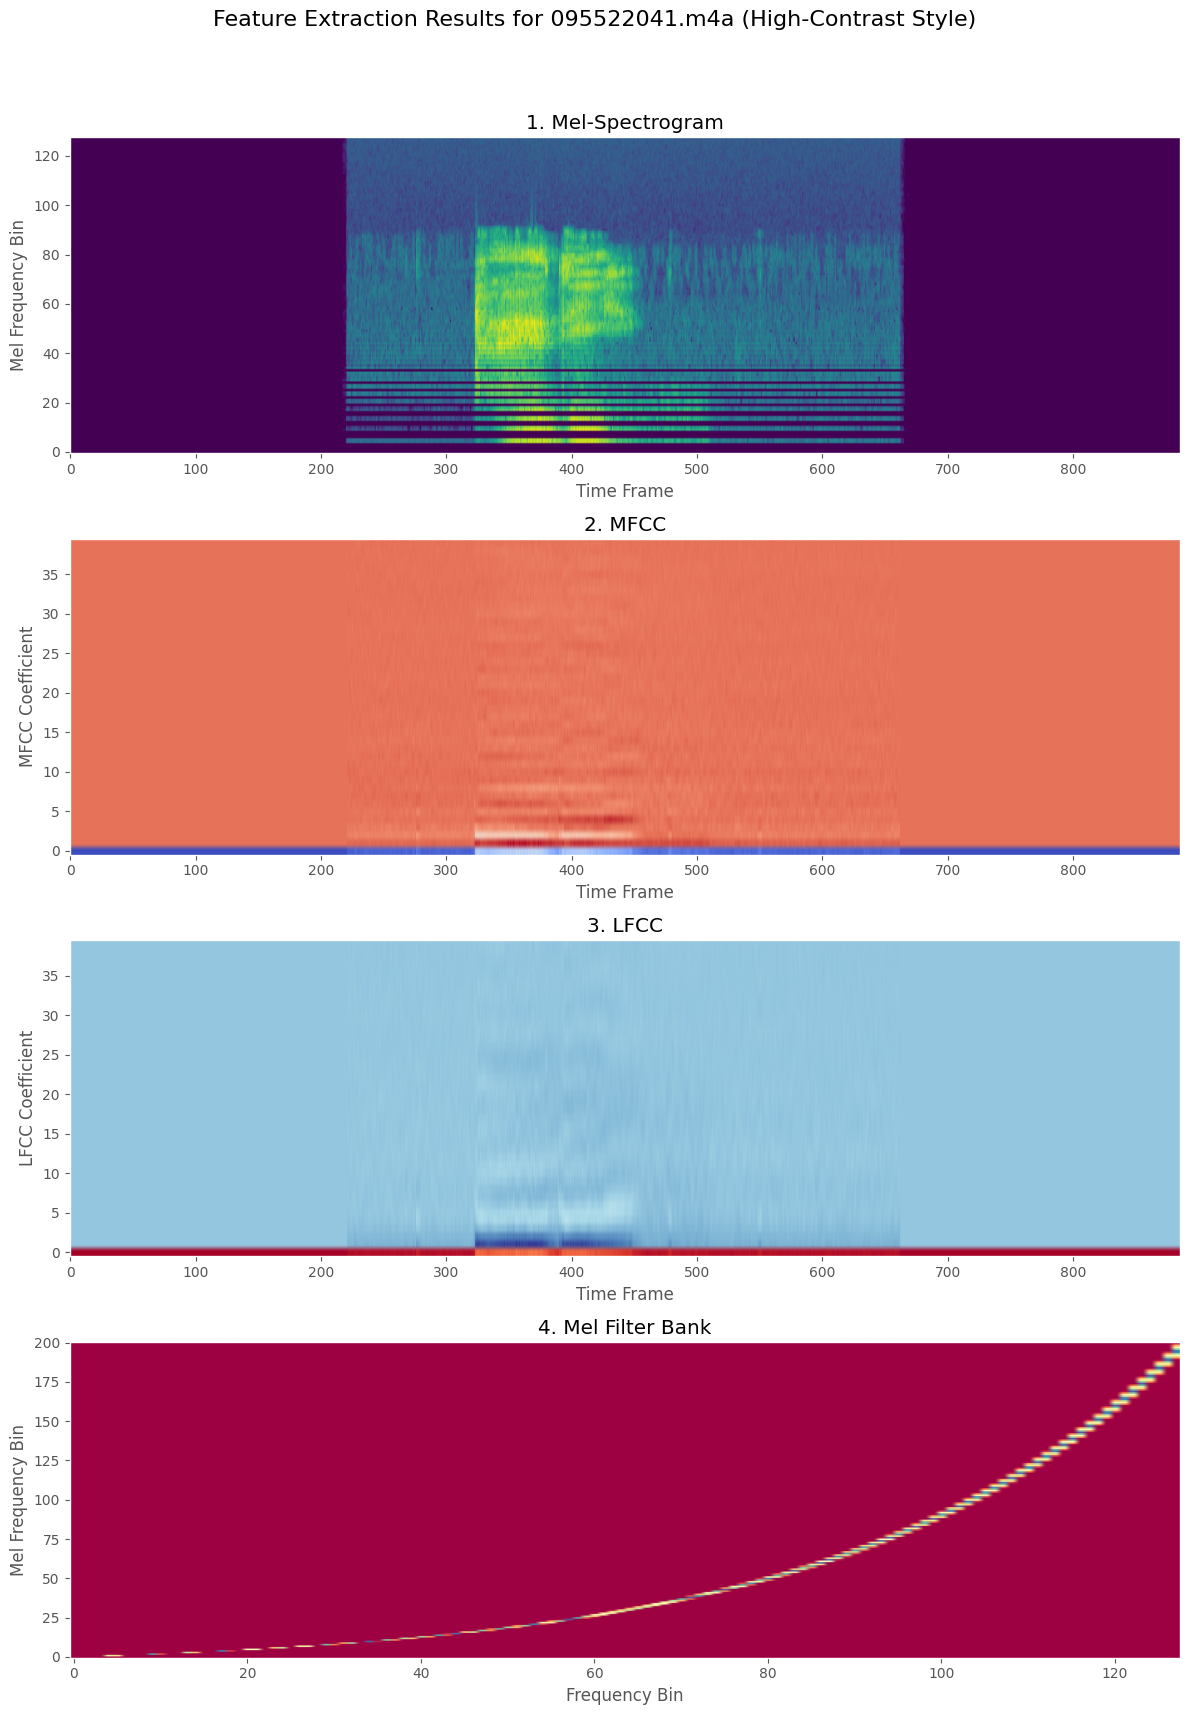

In [ ]:
import matplotlib.pyplot as plt
import torchaudio
import torchaudio.transforms as T
import torch
import os

# 1. 파일 로드
file_name = "095522041.m4a"
file_path = file_name

if not os.path.exists(file_path):
    print(f"오류: 파일 '{file_name}'이(가) 존재하지 않습니다. 파일을 다시 업로드해주세요.")
else:
    waveform, sample_rate = torchaudio.load(file_path)
    print("파일 로드 성공!")
    print(f"Sample rate: {sample_rate} Hz")
    print(f"Waveform shape: {waveform.shape}")

    # 2. 특징 추출 변환 정의 및 적용
    n_mels = 128
    n_mfcc = 40
    n_lfcc = 40
    n_fft = 400
    hop_length = 200

    mel_spectrogram_transform = T.MelSpectrogram(
        sample_rate=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
    mfcc_transform = T.MFCC(
        sample_rate=sample_rate, n_mfcc=n_mfcc,
        melkwargs={"n_fft": n_fft, "hop_length": hop_length, "n_mels": n_mels})
    lfcc_transform = T.LFCC(
        sample_rate=sample_rate, n_lfcc=n_lfcc,
        speckwargs={"n_fft": n_fft, "win_length": n_fft, "hop_length": hop_length})

    mel_spectrogram = mel_spectrogram_transform(waveform)
    mfcc = mfcc_transform(waveform)
    lfcc = lfcc_transform(waveform)
    mel_filter_bank = mel_spectrogram_transform.mel_scale.fb

    # 3. 모든 특징 시각화 (현대적이고 고대비 스타일 적용)
    plt.style.use('ggplot') # ggplot 스타일 사용

    fig, axes = plt.subplots(4, 1, figsize=(12, 18))
    fig.suptitle(f"Feature Extraction Results for {file_name} (High-Contrast Style)", fontsize=16)

    db_transform = T.AmplitudeToDB()

    # 각 서브플롯에서 그리드 라인 제거
    for ax in axes:
        ax.grid(False)

    # 1. Mel-Spectrogram
    axes[0].imshow(db_transform(mel_spectrogram).numpy()[0], cmap='viridis', origin='lower', aspect='auto')
    axes[0].set_title("1. Mel-Spectrogram")
    axes[0].set_xlabel("Time Frame")
    axes[0].set_ylabel("Mel Frequency Bin")

    # 2. MFCC
    axes[1].imshow(mfcc.numpy()[0], cmap='coolwarm', origin='lower', aspect='auto')
    axes[1].set_title("2. MFCC")
    axes[1].set_xlabel("Time Frame")
    axes[1].set_ylabel("MFCC Coefficient")

    # 3. LFCC
    axes[2].imshow(lfcc.numpy()[0], cmap='RdYlBu', origin='lower', aspect='auto')
    axes[2].set_title("3. LFCC")
    axes[2].set_xlabel("Time Frame")
    axes[2].set_ylabel("LFCC Coefficient")

    # 4. Mel Filter Bank
    axes[3].imshow(mel_filter_bank.numpy(), cmap='Spectral', origin='lower', aspect='auto')
    axes[3].set_title("4. Mel Filter Bank")
    axes[3].set_xlabel("Frequency Bin")
    axes[3].set_ylabel("Mel Frequency Bin")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [ ]:
import torchaudio
waveform, sample_rate = torchaudio.load("095522042.m4a")
print(waveform.shape, sample_rate)

torch.Size([1, 177152]) 44100


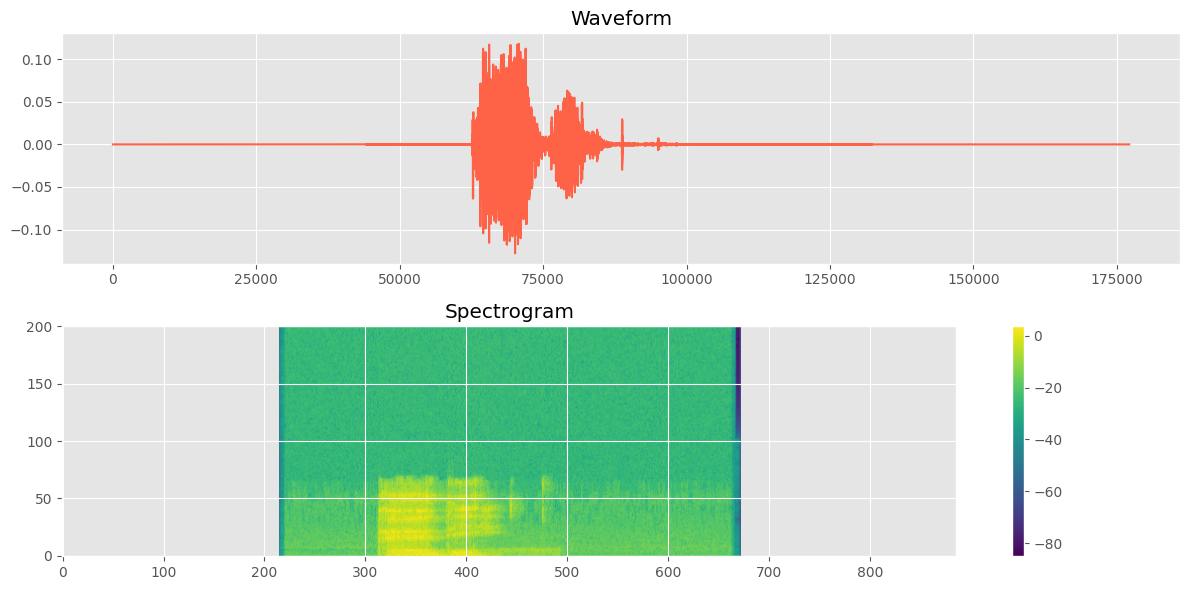

In [ ]:
import matplotlib.pyplot as plt
import torchaudio

waveform, sample_rate = torchaudio.load("095522042.m4a")

# 스펙트로그램 변환
spec = torchaudio.transforms.Spectrogram()(waveform)

# 1행 2열 또는 2행 1열 중 선택 (여기선 2행 1열)
fig, axs = plt.subplots(2, 1, figsize=(12, 6), sharex=False)

# Waveform
axs[0].plot(waveform.t().numpy(), color="tomato")
axs[0].set_title("Waveform")

# Spectrogram
img = axs[1].imshow(spec.log2()[0,:,:].numpy(), cmap="viridis", aspect="auto", origin="lower")
axs[1].set_title("Spectrogram")

# 색상바 추가 (옵션)
fig.colorbar(img, ax=axs[1])

plt.tight_layout()
plt.show()


Original Sample Rate: 44100, Shape: torch.Size([1, 177152])
Downsampled Shape: torch.Size([1, 32137])
Upsampled Shape: torch.Size([1, 128546])


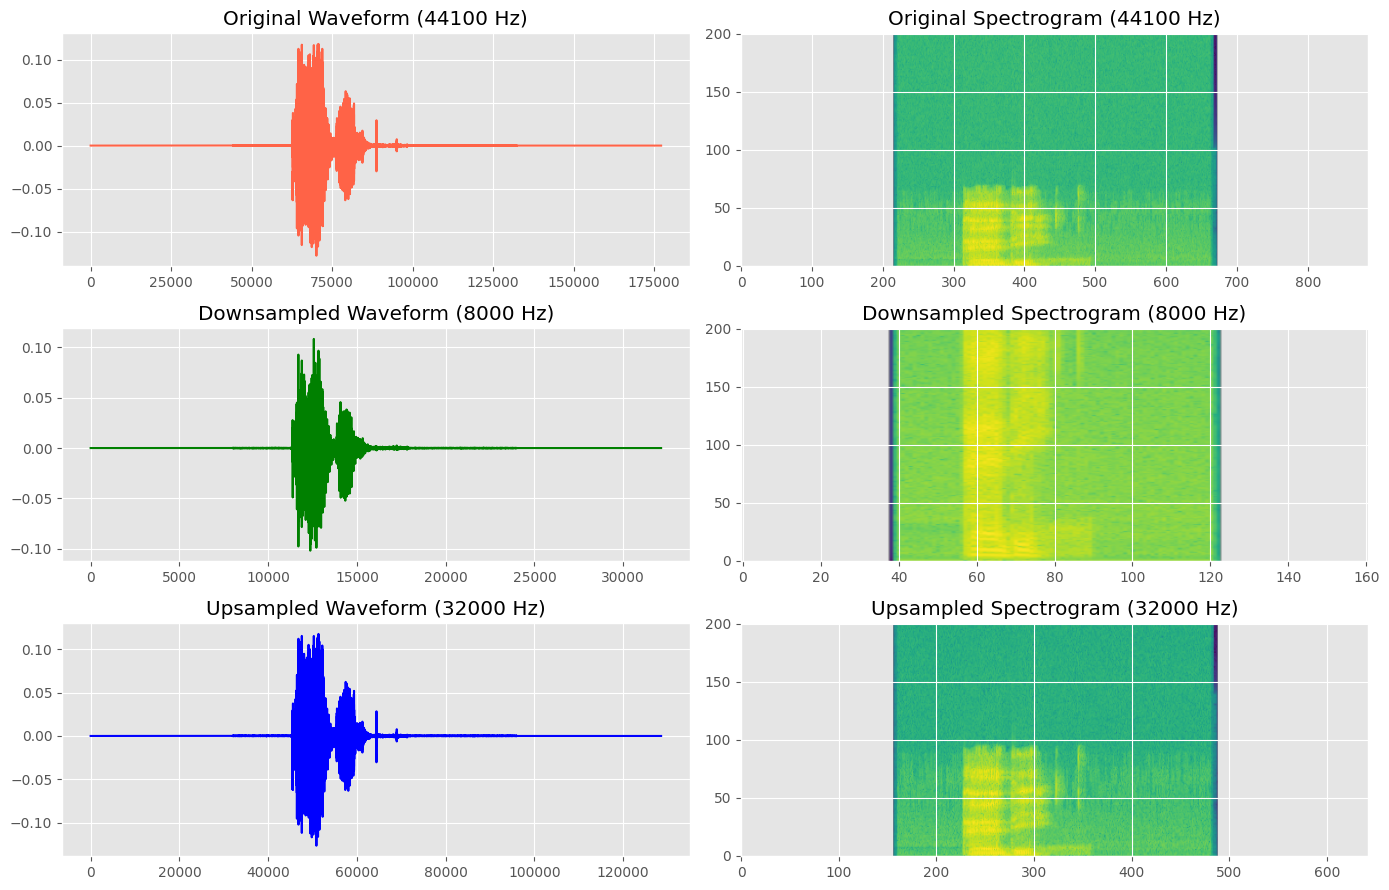

In [ ]:
import torchaudio
import matplotlib.pyplot as plt

# 1.
waveform, sample_rate = torchaudio.load("095522042.m4a")
print(f"Original Sample Rate: {sample_rate}, Shape: {waveform.shape}")

# 2. downsampling
down_rate = 8000
downsample = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=down_rate)
waveform_down = downsample(waveform)

# 3. upsampling
up_rate = 32000
upsample = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=up_rate)
waveform_up = upsample(waveform)

print(f"Downsampled Shape: {waveform_down.shape}")
print(f"Upsampled Shape: {waveform_up.shape}")

# 4. spectrogram
def plot_spectrogram(waveform, sr, ax, title):
    spec = torchaudio.transforms.Spectrogram()(waveform)
    ax.imshow(spec.log2()[0,:,:].numpy(), cmap="viridis", aspect="auto", origin="lower")
    ax.set_title(f"{title} ({sr} Hz)")

# 5. visualization
fig, axs = plt.subplots(3, 2, figsize=(14, 9))

# original form
axs[0,0].plot(waveform.t().numpy(), color="tomato")
axs[0,0].set_title(f"Original Waveform ({sample_rate} Hz)")
plot_spectrogram(waveform, sample_rate, axs[0,1], "Original Spectrogram")

# downsampling
axs[1,0].plot(waveform_down.t().numpy(), color="green")
axs[1,0].set_title(f"Downsampled Waveform ({down_rate} Hz)")
plot_spectrogram(waveform_down, down_rate, axs[1,1], "Downsampled Spectrogram")

# upsampling
axs[2,0].plot(waveform_up.t().numpy(), color="blue")
axs[2,0].set_title(f"Upsampled Waveform ({up_rate} Hz)")
plot_spectrogram(waveform_up, up_rate, axs[2,1], "Upsampled Spectrogram")

plt.tight_layout()
plt.show()


/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/utils.py:213: UserWarning: In 2.9, this function's implementation will be changed to use torchaudio.load_with_torchcodec` under the hood. Some parameters like ``normalize``, ``format``, ``buffer_size``, and ``backend`` will be ignored. We recommend that you port your code to rely directly on TorchCodec's decoder instead: https://docs.pytorch.org/torchcodec/stable/generated/torchcodec.decoders.AudioDecoder.html#torchcodec.decoders.AudioDecoder.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/ffmpeg.py:88: UserWarning: torio.io._streaming_media_decoder.StreamingMediaDecoder has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be r

Sample Rate: 44100, Shape: torch.Size([1, 177152])


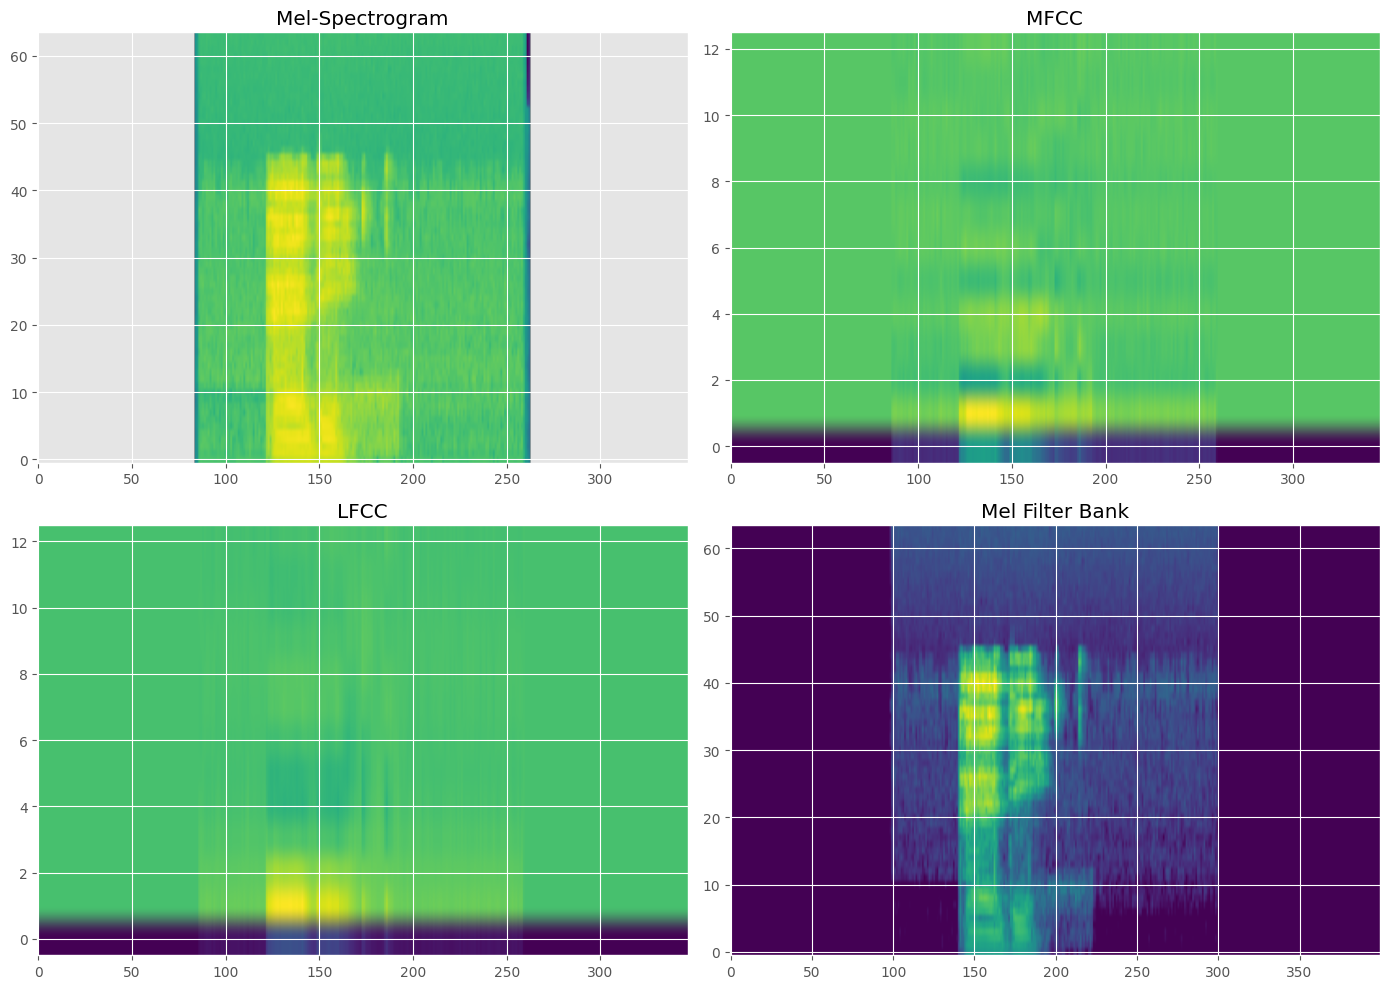

In [ ]:
import torchaudio
import matplotlib.pyplot as plt

# 1. load audio-file
waveform, sample_rate = torchaudio.load("095522042.m4a")
print(f"Sample Rate: {sample_rate}, Shape: {waveform.shape}")

# 2. Mel-Spectrogram
mel_spec = torchaudio.transforms.MelSpectrogram(
    sample_rate=sample_rate,
    n_fft=1024,
    hop_length=512,
    n_mels=64
)(waveform)

# 3. MFCC
mfcc = torchaudio.transforms.MFCC(
    sample_rate=sample_rate,
    n_mfcc=13,
    melkwargs={"n_fft":1024, "hop_length":512, "n_mels":64}
)(waveform)

# 4. LFCC (Linear Frequency Cepstral Coefficients)
lfcc = torchaudio.transforms.LFCC(
    sample_rate=sample_rate,
    n_lfcc=13,
    speckwargs={"n_fft":1024, "hop_length":512}
)(waveform)

# 5. Mel Filter Bank (FBank)
fbank = torchaudio.compliance.kaldi.fbank(
    waveform,
    num_mel_bins=64,
    sample_frequency=sample_rate
)

# 6. Visualization
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Mel-Spectrogram
axs[0,0].imshow(mel_spec.log2()[0,:,:].detach().numpy(), cmap="viridis", aspect="auto", origin="lower")
axs[0,0].set_title("Mel-Spectrogram")

# MFCC
axs[0,1].imshow(mfcc[0].detach().numpy(), cmap="viridis", aspect="auto", origin="lower")
axs[0,1].set_title("MFCC")

# LFCC
axs[1,0].imshow(lfcc[0].detach().numpy(), cmap="viridis", aspect="auto", origin="lower")
axs[1,0].set_title("LFCC")

# Mel Filter Bank
axs[1,1].imshow(fbank.detach().numpy().T, cmap="viridis", aspect="auto", origin="lower")
axs[1,1].set_title("Mel Filter Bank")

plt.tight_layout()
plt.show()
